In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import FuncFormatter
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('credit_card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMTJUNE,BILL_AMTMAY,BILL_AMTAPR,PAY_AMTSEPT,PAY_AMTAUG,PAY_AMTJULY,PAY_AMTJUNE,PAY_AMTMAY,PAY_AMTAPR,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.isnull().sum()

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMTSEPT    0
BILL_AMTAUG     0
BILL_AMTJULY    0
BILL_AMTJUNE    0
BILL_AMTMAY     0
BILL_AMTAPR     0
PAY_AMTSEPT     0
PAY_AMTAUG      0
PAY_AMTJULY     0
PAY_AMTJUNE     0
PAY_AMTMAY      0
PAY_AMTAPR      0
DEFAULT         0
dtype: int64

In [4]:
data['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [5]:
data['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [6]:
data['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [7]:
data['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64

In [8]:
data['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [9]:
data['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [10]:
data['PAY_1'].replace(-2,-1,inplace=True)
data['PAY_2'].replace(-2,-1,inplace=True)
data['PAY_3'].replace(-2,-1,inplace=True)
data['PAY_4'].replace(-2,-1,inplace=True)
data['PAY_5'].replace(-2,-1,inplace=True)
data['PAY_6'].replace(-2,-1,inplace=True)

### There is no description of -2 in the problem statement as it has negative sign we took it as the customer pays the payment duly so we replaced it by -1.

In [11]:
data['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [12]:
# Percentage of 1 is more than 20% therefore it is a balanced data. 
6636/(6636+23364)

0.2212

In [13]:
data.SEX.unique()

array([2, 1], dtype=int64)

In [14]:
data['SEX'].replace(2,0,inplace=True)

In [15]:
data['SEX'].value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

In [16]:
# Create a contingency table of 
# gender (male / female) and
# default status (default / non-default)

default_sex_crosstab = pd.crosstab(data['DEFAULT'], 
                                   data['SEX'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

# SEX: 
# 1 = male; 2 = female
new_columns = {1 : 'Male', 0 : 'Female'}

default_sex_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_sex_crosstab

SEX,Female,Male,All
DEFAULT,,,
Non-default,14349,9015,23364
Default,3763,2873,6636
All,18112,11888,30000


In [17]:
default_sex_crosstab_norm =  default_sex_crosstab / default_sex_crosstab.loc['All']
default_sex_crosstab_norm

SEX,Female,Male,All
DEFAULT,,,
Non-default,0.792237,0.758328,0.7788
Default,0.207763,0.241672,0.2212
All,1.000000,1.000000,1.0000


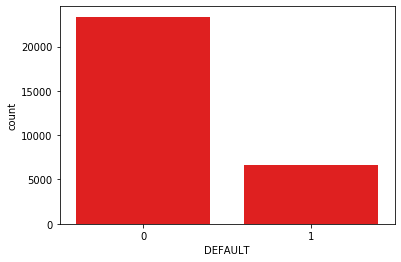

In [18]:
sns.countplot(data['DEFAULT'],color='red')

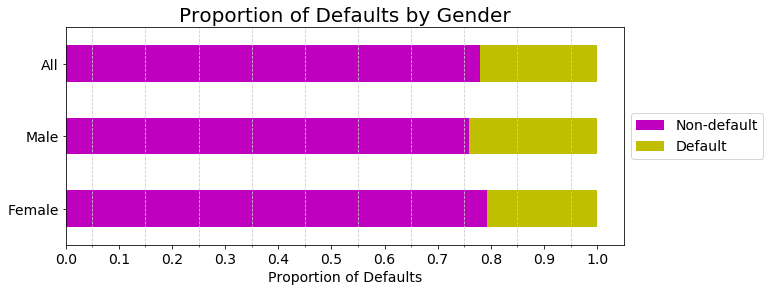

In [19]:
fig, ax = plt.subplots(1, 1)

my_colors = ['0.1','0.35',]
default_sex_crosstab_norm[0:2].T.plot.barh(stacked=True, 
                                           figsize=(10,4), 
                                           xticks=list(np.linspace(0, 1, 11)),
                                           rot=0, 
                                           fontsize=14,
                                           color="my_colors", 
                                           ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.grid(b=True, which='minor', color='.8', linestyle='--')

ax.yaxis.label.set_visible(False)


plt.title('Proportion of Defaults by Gender', fontsize=20)
plt.xlabel('Proportion of Defaults', fontsize=14)

plt.show()

In [20]:
#hypothesis testing
def make_proportion_dict(df):
    """
    Given a DataFrame, return a dictionary where sex labels
    ('Male' and 'Female') are the keys and the proportion of 
    defaults are the values.
    """
    output_dict = {'Male': df[df['SEX'] == 1]['DEFAULT'].value_counts(normalize=True).loc[1],
                   'Female': df[df['SEX'] == 0] ['DEFAULT'].value_counts(normalize=True).loc[1]}
    return output_dict

In [21]:
make_proportion_dict(data)

{'Male': 0.2416722745625841, 'Female': 0.20776280918727916}

In [22]:
def resample(df, iters=1000):
    list_m = []
    list_w = []
    n = len(df)
    for i in range(iters):
        resampled_df = data[['DEFAULT', 
                           'SEX']].sample(n=n, replace=True)
        proportions = make_proportion_dict(resampled_df)
        list_m.append(proportions['Male'])
        list_w.append(proportions['Female'])
    prop_array_m = np.array(list_m)
    prop_array_w = np.array(list_w)
    return prop_array_m, prop_array_w

In [23]:
results_m, results_w = resample(data, iters=1000)

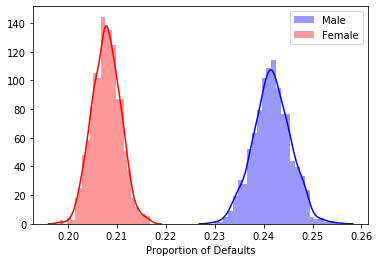

In [24]:
sns.distplot(results_m,
             norm_hist=True, 
             label='Male',color='blue')
sns.distplot(results_w,
             norm_hist=True, 
             label='Female',color='red')

plt.xlabel('Proportion of Defaults')
plt.legend()

In [25]:
data.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [26]:
data.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [27]:
data.groupby(['DEFAULT','EDUCATION'])['EDUCATION'].count()

DEFAULT  EDUCATION
0        0               14
         1             8549
         2            10700
         3             3680
         4              116
         5              262
         6               43
1        1             2036
         2             3330
         3             1237
         4                7
         5               18
         6                8
Name: EDUCATION, dtype: int64

In [28]:
data.groupby(['DEFAULT','MARRIAGE'])['MARRIAGE'].count()

DEFAULT  MARRIAGE
0        0              49
         1           10453
         2           12623
         3             239
1        0               5
         1            3206
         2            3341
         3              84
Name: MARRIAGE, dtype: int64

# Classifying 0,5,6 to 4 as the problem statement doesn't mention anything about the categories 0,5,6 so we will merge it to category others i.e. 4

In [29]:
data['EDUCATION'].replace({0:4,5:4,6:4},inplace=True)
data['EDUCATION'].replace({1:'Graduate School',2:'University',3:'High School',4:'Others'},inplace=True)

In [30]:
# education (Graduate school / University / High school /Others) and
# default status (default / non-default)

default_edu_crosstab = pd.crosstab(data['DEFAULT'], 
                                   data['EDUCATION'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

# EDUCATION: 
# 1 = graduate school; 2 = university; 3 = high school; 4 = others.
new_columns = {1 : 'Graduate school', 
               2 : 'University', 
               3 : 'High school', 
               4 : 'Others'}

default_edu_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_edu_crosstab

EDUCATION,Graduate School,High School,Others,University,All
DEFAULT,,,,,
Non-default,8549,3680,435,10700,23364
Default,2036,1237,33,3330,6636
All,10585,4917,468,14030,30000


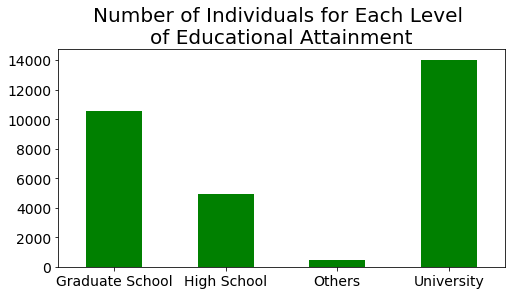

In [31]:
# each level of educational attainment.

fig, ax = plt.subplots(1, 1)

my_colors = ['0.6']

default_edu_crosstab.loc['All'][0:4].plot.bar(figsize=(8,4), 
                                              rot=0, 
                                              fontsize=14,
                                              color='green', 
                                              ax=ax)

plt.title('Number of Individuals for Each Level \nof Educational Attainment', 
          fontsize=20)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

#formatter = FuncFormatter(yaxis_formatter_fn)
#ax.yaxis.set_major_formatter(formatter)

ax.xaxis.label.set_visible(False)

plt.show()

In [32]:
default_edu_crosstab_norm =  default_edu_crosstab / default_edu_crosstab.loc['All']
default_edu_crosstab_norm

EDUCATION,Graduate School,High School,Others,University,All
DEFAULT,,,,,
Non-default,0.807652,0.748424,0.929487,0.762651,0.7788
Default,0.192348,0.251576,0.070513,0.237349,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


Text(0.5, 0, 'Proportion of Defaults')

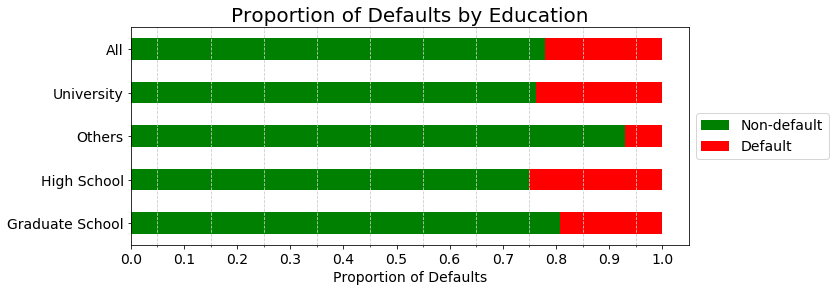

In [33]:
# Plot the proportion of defaults by level of education, showing:
#   1. the proportion of defaults for individuals with high school education;
#   2. the proportion of defaults for individuals with univeresity education;
#   3. the proportion of defaults for individuals with graduate school education;
#   4. the proportion of defaults for individuals categorized as 'others';
#   5. the proportion of defaults for the entire data set.

fig, ax = plt.subplots(1, 1)

my_colors = ['green','red',]
default_edu_crosstab_norm[0:2].T.plot.barh(stacked=True, 
                                           figsize=(10,4), 
                                           xticks=list(np.linspace(0, 1, 11)),
                                           rot=0, 
                                           fontsize=14,
                                           color=my_colors, 
                                           ax=ax)

lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.grid(b=True, which='minor', color='.8', linestyle='--')

ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Education', fontsize=20)
plt.xlabel('Proportion of Defaults', fontsize=14)

In [34]:
pd.set_option('display.max_columns', 500)

In [35]:
data.rename(columns={'PAY_AMT1':'PAY_AMTSEPT','PAY_AMT2':'PAY_AMTAUG','PAY_AMT3':'PAY_AMTJULY','PAY_AMT4':'PAY_AMTJUNE','PAY_AMT5':'PAY_AMTMAY','PAY_AMT6':'PAY_AMTAPR'},inplace=True)

In [36]:
data.rename(columns={'BILL_AMT1':'BILL_AMTSEPT','BILL_AMT2':'BILL_AMTAUG','BILL_AMT3':'BILL_AMTJULY','BILL_AMT4':'BILL_AMTJUNE','BILL_AMT5':'BILL_AMTMAY','BILL_AMT6':'BILL_AMTAPR'},inplace=True)

In [37]:
data.rename(columns={'PAY_1':'September','PAY_2':'August','PAY_3':'July','PAY_4':'June','PAY_5':'May','PAY_6':'April'},inplace=True)

In [38]:
data[(data['BILL_AMTSEPT']<0)|(data['BILL_AMTAUG']<0)|(data['BILL_AMTJULY']<0)|(data['BILL_AMTJUNE']<0)|(data['BILL_AMTMAY']<0)|(data['BILL_AMTAPR']<0)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,September,August,July,June,May,April,BILL_AMTSEPT,BILL_AMTAUG,BILL_AMTJULY,BILL_AMTJUNE,BILL_AMTMAY,BILL_AMTAPR,PAY_AMTSEPT,PAY_AMTAUG,PAY_AMTJULY,PAY_AMTJUNE,PAY_AMTMAY,PAY_AMTAPR,DEFAULT
7,8,100000,0,University,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
26,27,60000,1,Graduate School,2,27,1,-1,-1,-1,-1,-1,-109,-425,259,-57,127,-189,0,1000,0,500,0,1000,1
35,36,160000,1,Graduate School,2,30,-1,-1,-1,-1,-1,-1,30265,-131,-527,-923,-1488,-1884,131,396,396,565,792,0,0
37,38,60000,0,University,2,22,0,0,0,0,0,-1,15054,9806,11068,6026,-28335,18660,1500,1518,2043,0,47671,617,0
56,57,180000,0,High School,1,34,0,0,0,-1,-1,-1,16386,15793,8441,7142,-679,8321,8500,1500,7500,679,9000,2000,0
68,69,130000,0,High School,2,29,1,-1,-1,-1,2,-1,-190,-9850,-9850,10311,10161,7319,0,0,20161,0,7319,13899,0
72,73,200000,0,University,1,32,-1,-1,-1,-1,2,-1,9076,5787,-684,5247,3848,3151,5818,15,9102,17,3165,1395,0
92,93,100000,0,Graduate School,2,27,-1,-1,-1,-1,-1,-1,-2000,5555,0,0,0,0,7555,0,0,0,0,0,0
101,102,380000,0,Graduate School,2,30,-1,-1,-1,0,0,0,-81,-303,32475,32891,33564,34056,223,33178,1171,1197,1250,5000,0
109,110,360000,1,University,1,35,1,-1,-1,-1,-1,-1,-103,-103,-103,-103,-103,-103,0,0,0,0,0,0,0


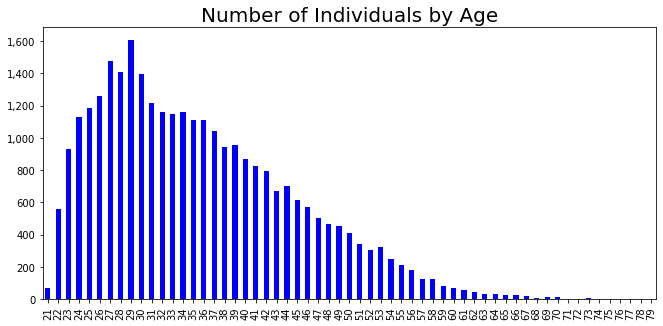

In [39]:
# Plot the number of individuals by age.

# Create series of the number of individuals by age.
age_count = data['AGE'].value_counts().sort_index(ascending=True)

# Fill in missing age counts with zeros.
for i in list(range(age_count.index.min(), age_count.index.max()+1)):
    if i not in age_count.index:
        s = pd.Series([0], index=[i])
        age_count = age_count.append(s)

age_count.sort_index(ascending=True, inplace=True)

# Plot the Series

fig, ax = plt.subplots(1, 1)

my_colors = ['blue']

age_count.plot.bar(figsize=(11,5), 
                   rot=90, 
                   fontsize=10,
                   color=my_colors, 
                   ax=ax)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

formatter = FuncFormatter(yaxis_formatter_fn)
ax.yaxis.set_major_formatter(formatter)

ax.xaxis.label.set_visible(False)

plt.title('Number of Individuals by Age', 
          fontsize=20)
plt.xlabel('Age', fontsize=14)

plt.show()


In [40]:

# Create a contingency table of age and
# default status (default / non-default)

default_age_crosstab = pd.crosstab(data['DEFAULT'], 
                                   data['AGE'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

default_age_crosstab.rename(index=new_index, inplace=True)
default_age_crosstab

AGE,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,79,All
DEFAULT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default,53,391,684,827,884,1003,1164,1123,1292,1121,988,933,931,931,887,854,812,750,755,683,639,609,520,538,501,413,381,362,333,310,252,226,251,191,152,129,95,91,62,44,35,37,23,22,19,18,11,4,12,8,3,2,1,1,2,1,23364
Default,14,169,247,300,302,253,313,286,313,274,229,225,215,231,226,254,229,194,199,187,185,185,150,162,116,157,120,104,119,101,88,78,74,56,57,49,27,31,21,23,21,7,8,9,5,7,5,1,3,2,0,1,3,0,1,0,6636
All,67,560,931,1127,1186,1256,1477,1409,1605,1395,1217,1158,1146,1162,1113,1108,1041,944,954,870,824,794,670,700,617,570,501,466,452,411,340,304,325,247,209,178,122,122,83,67,56,44,31,31,24,25,16,5,15,10,3,3,4,1,3,1,30000


In [41]:
# Normalize the contingency table columns
# by dividing each column by the column's total.

default_age_crosstab_norm =  default_age_crosstab / default_age_crosstab.loc['All']
default_age_crosstab_norm

AGE,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,79,All
DEFAULT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default,0.791045,0.698214,0.734694,0.733807,0.745363,0.798567,0.788084,0.797019,0.804984,0.803584,0.811832,0.805699,0.812391,0.801205,0.796945,0.770758,0.780019,0.794492,0.791405,0.785057,0.775485,0.767003,0.776119,0.768571,0.811994,0.724561,0.760479,0.776824,0.736726,0.754258,0.741176,0.743421,0.772308,0.773279,0.727273,0.724719,0.778689,0.745902,0.746988,0.656716,0.625,0.840909,0.741935,0.709677,0.791667,0.72,0.6875,0.8,0.8,0.8,1.0,0.666667,0.25,1.0,0.666667,1.0,0.7788
Default,0.208955,0.301786,0.265306,0.266193,0.254637,0.201433,0.211916,0.202981,0.195016,0.196416,0.188168,0.194301,0.187609,0.198795,0.203055,0.229242,0.219981,0.205508,0.208595,0.214943,0.224515,0.232997,0.223881,0.231429,0.188006,0.275439,0.239521,0.223176,0.263274,0.245742,0.258824,0.256579,0.227692,0.226721,0.272727,0.275281,0.221311,0.254098,0.253012,0.343284,0.375,0.159091,0.258065,0.290323,0.208333,0.28,0.3125,0.2,0.2,0.2,0.0,0.333333,0.75,0.0,0.333333,0.0,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00,1.0000,1.0,1.0,1.0,1.0,1.000000,1.00,1.0,1.000000,1.0,1.0000


Text(0.5, 0, 'Age')

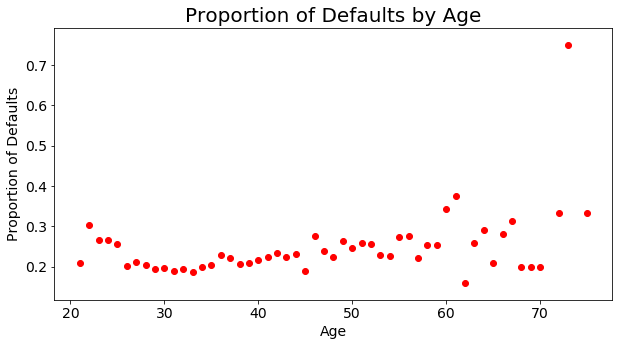

In [42]:
# Plot the proportion of defaults by age, but only
# for ages with at least 50 observations.

my_df = data.groupby(['AGE', 'DEFAULT']).size().unstack()



# Calculate proportions
my_df = my_df.div(my_df.sum(axis=1), axis='index')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10,5))

my_colors = ['0.3']

ax.scatter(x=my_df.index,
           y=my_df[1], 
           color='red')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

plt.title('Proportion of Defaults by Age', fontsize=20)
plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Age', fontsize=14)

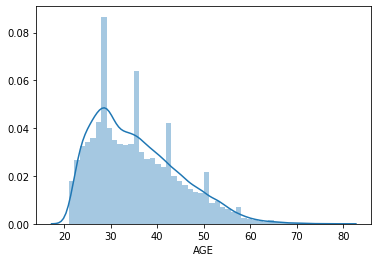

In [43]:
sns.distplot(data['AGE'])

In [44]:
# Credit limit bins
def float_range(start, stop, step=1.0):
    '''Generator that yields a range of floating point numbers'''
    while start < stop:
        yield start
        start +=step

In [45]:
# Plot the proportion of defaults for each 
# credit limit bin.

# Create a list to bin credit limit observations
# The bin size is 10,000 Taiwan New Dollars.

step = 10000
start = round((data['LIMIT_BAL'].min()), -4)
stop = round((data['LIMIT_BAL'].max() + step), -4)
        
bins = []
for i in float_range(start, stop, step):
    bins.append(round(i,1))

group_names = bins[0:(len(bins)-1)]
group_names

# Bin the data

df_wrangled_copy = data.copy()

categories = pd.cut(df_wrangled_copy['LIMIT_BAL'], 
                    bins=bins, 
                    labels=group_names)

df_wrangled_copy['LIMIT_BAL_BINNED'] = categories

my_df = df_wrangled_copy.groupby(['LIMIT_BAL_BINNED','DEFAULT']).size().unstack()

# Require at least 50 total observations per age
my_df = my_df[my_df.sum(axis=1) > 1]

my_df = my_df.div(my_df.sum(axis=1), axis='index')
my_df.sort_index(ascending=False, inplace=True)

Text(0.5, 0, 'Limit Balance')

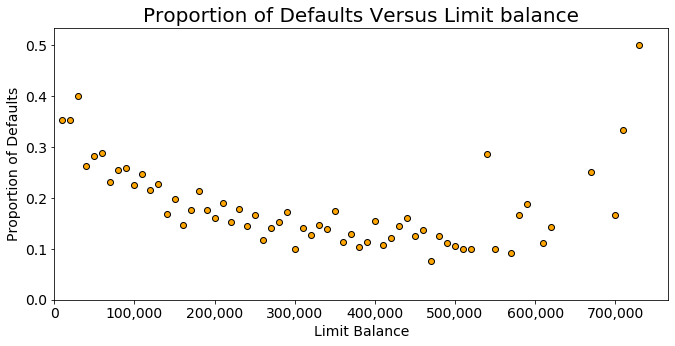

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(11,5))

my_colors = ['orange']

plt.scatter(x=my_df.index, y=my_df[1],
            c=my_colors,  
            edgecolors='black', 
            linewidths=1)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

formatter = FuncFormatter(yaxis_formatter_fn)
ax.xaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')

plt.title('Proportion of Defaults Versus Limit balance', 
          fontsize=20)    
plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Limit Balance', fontsize=14)


In [47]:
data.describe()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,September,August,July,June,May,April,BILL_AMTSEPT,BILL_AMTAUG,BILL_AMTJULY,BILL_AMTJUNE,BILL_AMTMAY,BILL_AMTAPR,PAY_AMTSEPT,PAY_AMTAUG,PAY_AMTJULY,PAY_AMTJUNE,PAY_AMTMAY,PAY_AMTAPR,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,0.396267,1.551867,35.485500,0.075267,-0.007700,-0.030033,-0.075733,-0.114667,-0.127933,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.521970,9.217904,0.990775,1.035798,1.025036,0.987436,0.941921,0.949384,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,0.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [48]:
data[(data["LIMIT_BAL"]>500000)& (data['DEFAULT']==1)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,September,August,July,June,May,April,BILL_AMTSEPT,BILL_AMTAUG,BILL_AMTJULY,BILL_AMTJUNE,BILL_AMTMAY,BILL_AMTAPR,PAY_AMTSEPT,PAY_AMTAUG,PAY_AMTJULY,PAY_AMTJUNE,PAY_AMTMAY,PAY_AMTAPR,DEFAULT
451,452,600000,1,Graduate School,1,53,2,2,0,0,0,0,467150,458862,469703,447130,440982,434715,0,18000,16000,16000,21000,20000,1
527,528,620000,0,University,1,45,2,2,0,0,0,0,160837,156839,160440,163781,167159,170894,0,6200,6000,6000,6500,6000,1
2249,2250,550000,0,University,1,32,0,0,0,0,0,0,546741,535509,548020,530672,155083,165975,22863,167622,14000,4300,158064,28840,1
3339,3340,550000,1,Graduate School,1,49,-1,-1,-1,-1,-1,-1,42141,1515,1488,18334,-114,-114,1522,1495,18426,0,0,22670,1
3402,3403,710000,0,University,1,40,-1,-1,-1,-1,2,0,5200,0,0,1004,854,8626,0,0,1004,0,8000,5000,1
4703,4704,520000,1,High School,1,41,2,2,0,0,0,0,435924,366194,330211,251920,256512,262474,0,12620,8758,9047,9959,10500,1
5286,5287,520000,0,Graduate School,2,33,0,0,0,0,0,0,485298,499489,413019,168770,168964,191188,22000,18300,26500,30000,27000,25000,1
10895,10896,630000,0,Graduate School,2,29,0,0,0,0,0,0,497106,497921,490093,435019,329476,338557,15868,12371,26454,8510,11039,5390,1
12243,12244,550000,0,Graduate School,2,34,-1,0,0,0,0,0,42132,44045,45392,48244,36206,38021,3005,3004,4010,3002,3000,10010,1
13883,13884,740000,0,University,1,35,2,-1,-1,-1,-1,-1,960,8154,1477,15713,8988,25449,8229,1487,15754,9012,25596,7003,1


In [49]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'September',
       'August', 'July', 'June', 'May', 'April', 'BILL_AMTSEPT', 'BILL_AMTAUG',
       'BILL_AMTJULY', 'BILL_AMTJUNE', 'BILL_AMTMAY', 'BILL_AMTAPR',
       'PAY_AMTSEPT', 'PAY_AMTAUG', 'PAY_AMTJULY', 'PAY_AMTJUNE', 'PAY_AMTMAY',
       'PAY_AMTAPR', 'DEFAULT'],
      dtype='object')

In [50]:
pay_list=['September','August', 'July', 'June', 'May', 'April']

pay_dfs = {}

for item in pay_list:
    pay_dfs[item] = data.groupby([item, 'DEFAULT']).size().unstack()
    # Require at least 50 total observations
    
    pay_dfs[item] = pay_dfs[item][pay_dfs[item].sum(axis=1)>25]
    
    # Calculate proportions
    pay_dfs[item] = pay_dfs[item].div(pay_dfs[item].sum(axis=1), axis='index')
    pay_dfs[item].sort_index(ascending=False, inplace=True)

In [51]:
label_dict={'September':'sept','August':'aug', 'July':'jul', 'June':'june', 'May':'may', 'April':'april'}

Text(0.5, 0, 'Repayment Status')

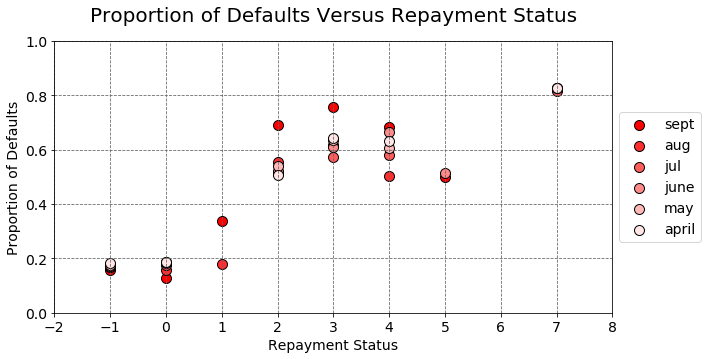

In [52]:
mycolor=['red','yellow','orange','blue','green','violet']
sns.set_palette(sns.light_palette('red', reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(10,5))

for item in pay_list:
    ax.scatter(x=pay_dfs[item].index, 
               y=pay_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)          
    
ax.set_ylim([0, 1])

ticks = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]#, 9]
plt.xticks(ticks, rotation=0)
#plt.xticks(x, labels, rotation='vertical')

ax.xaxis.set_ticks(ticks=ticks, minor=False)

ax.grid(b=True, which='major', color='0.4', linestyle='--')

lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')
        
sns.set_palette(sns.light_palette("navy", reverse=True))
        
#plt.title('Proportion of Defaults Versus Repayment Status', 
#          fontsize=20)  

plt.title('Proportion of Defaults Versus Repayment Status', 
          fontsize=20,
          y = 1.05) 

plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Repayment Status', fontsize=14)




# Classifying 0 to 3 as the problem statement doesn't mention anything about the category 0 so we will merge it to category others i.e. 3.

In [53]:
data['MARRIAGE'].replace(0,3,inplace=True)
data['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others'},inplace=True)

In [54]:
department_promotion_crosstab = pd.crosstab(data['DEFAULT'], 
                                   data['MARRIAGE'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = not-promoted; 1 = promoted
new_index = {0: 'non-default', 1: 'default', }
department_promotion_crosstab.rename(index=new_index, inplace=True)
department_promotion_crosstab

MARRIAGE,Married,Others,Single,All
DEFAULT,,,,
non-default,10453,288,12623,23364
default,3206,89,3341,6636
All,13659,377,15964,30000


In [55]:
department_promotion_crosstab =  department_promotion_crosstab / department_promotion_crosstab.loc['All']
department_promotion_crosstab

MARRIAGE,Married,Others,Single,All
DEFAULT,,,,
non-default,0.765283,0.763926,0.790717,0.7788
default,0.234717,0.236074,0.209283,0.2212
All,1.000000,1.000000,1.000000,1.0000


# Outlier Treatment:

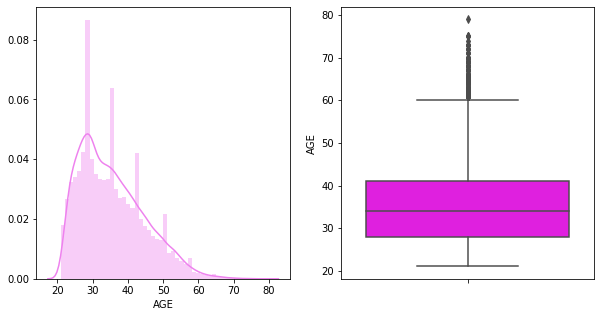

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(data['AGE'],color='violet')
plt.subplot(1,2,2)
sns.boxplot(y=data['AGE'],color='magenta')
plt.show()

In [57]:
q3=np.percentile(data['AGE'],75)
q1=np.percentile(data['AGE'],25)
IQR=q3-q1
ul=q3+(1.5*IQR)
ul

60.5

In [58]:
data=data[data['AGE']<ul]

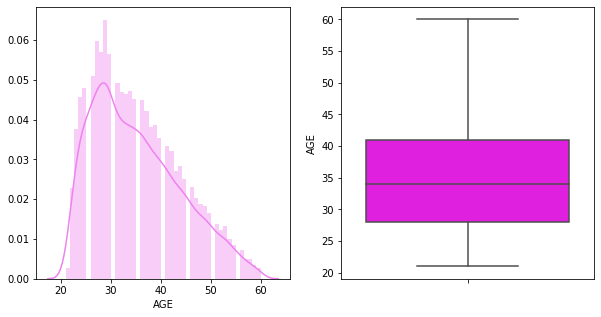

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(data['AGE'],color='violet')
plt.subplot(1,2,2)
sns.boxplot(y=data['AGE'],color='magenta')
plt.show()

### To treat the outliers we have done capping

# Univariate Analysis

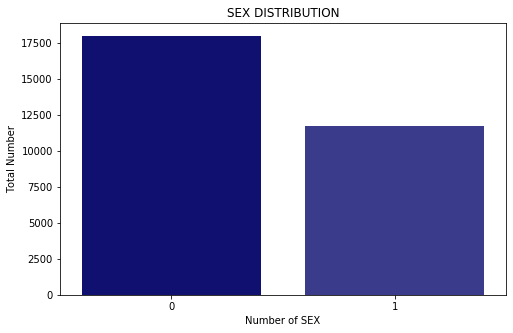

In [60]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="SEX", data=data)
plt.title('SEX DISTRIBUTION')
plt.xlabel('Number of SEX')
plt.ylabel('Total Number')
plt.show()




In [61]:
data['SEX'].unique()

array([0, 1], dtype=int64)

In [62]:
m=data[data['SEX']==1]
print('The Male percentage who applied for credit card:',round(m['DEFAULT'].count()/data['DEFAULT'].count(),4)*100)

The Male percentage who applied for credit card: 39.489999999999995


In [63]:
f=data[data['SEX']==0]
print('The Female percentage who applied for credit card:',round(f['DEFAULT'].count()/data['DEFAULT'].count(),4)*100)

The Female percentage who applied for credit card: 60.51


### Majority of credit card holder are females.

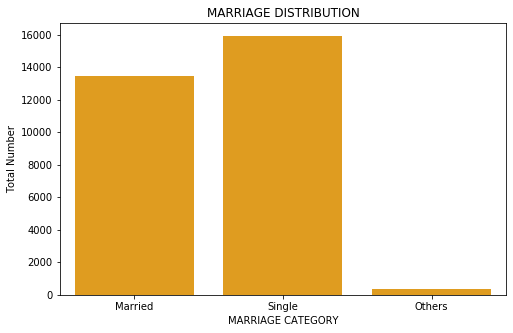

In [64]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="MARRIAGE", data=data,color='orange')
plt.title('MARRIAGE DISTRIBUTION')
plt.xlabel('MARRIAGE CATEGORY')
plt.ylabel('Total Number')
plt.show()



In [65]:
data['MARRIAGE'].value_counts()

Single     15922
Married    13434
Others       372
Name: MARRIAGE, dtype: int64

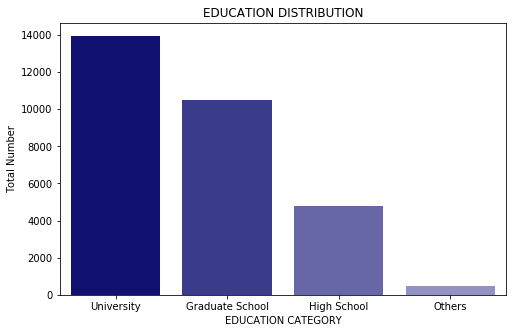

In [66]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="EDUCATION", data=data)
plt.title('EDUCATION DISTRIBUTION')
plt.xlabel('EDUCATION CATEGORY')
plt.ylabel('Total Number')
plt.show()


In [67]:
data['EDUCATION'].value_counts()

University         13949
Graduate School    10514
High School         4800
Others               465
Name: EDUCATION, dtype: int64

### Majority of credit card holder have education degree of University.

### Limit Balance Distribution:

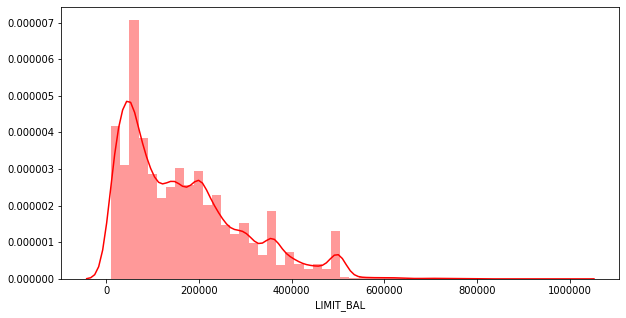

In [68]:
plt.figure(figsize = (10,5))
sns.distplot(data['LIMIT_BAL'],kde=True,color='red')
plt.show()

### Very few customer have the limit balance more than 200000.

# Past Payment Distribution:

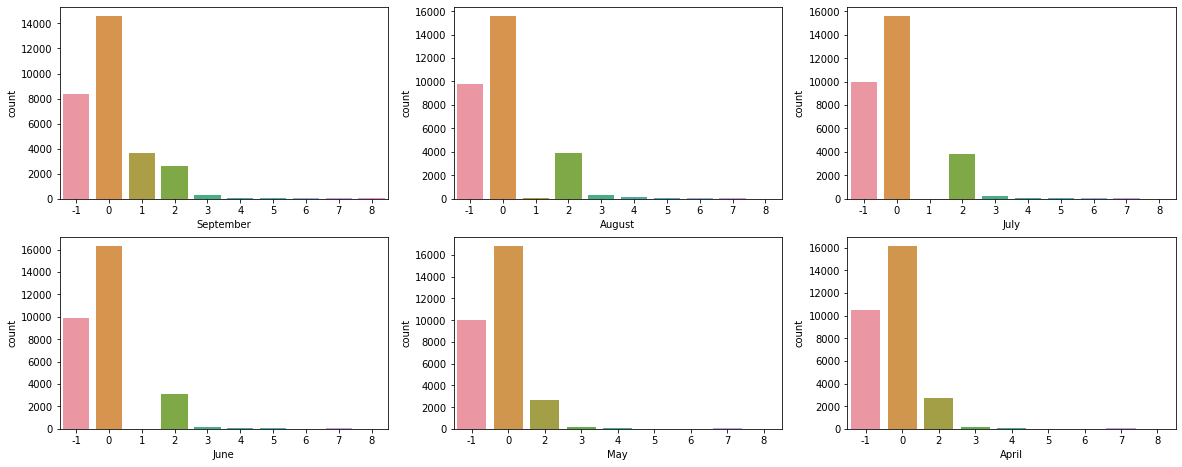

In [69]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.countplot(data['September'])
plt.subplot(3,3,2)
sns.countplot(data['August'])
plt.subplot(3,3,3)
sns.countplot(data['July'])
plt.subplot(3,3,4)
sns.countplot(data['June'])
plt.subplot(3,3,5)
sns.countplot(data['May'])
plt.subplot(3,3,6)
sns.countplot(data['April'])
plt.show()

#### Value after 0 are more prone to be defaulter.

# Bivariate Analysis:

### SEX & DEFAULT


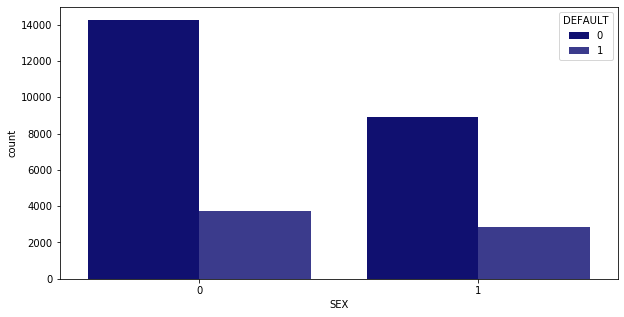

In [70]:
plt.figure(figsize = (10,5))
sns.countplot(data['SEX'],hue=data['DEFAULT'])
plt.show()

In [71]:
a=data[data['SEX']==1]
print('The Defaulter percentage of male in male population is:',round(a['DEFAULT'].sum()/a['DEFAULT'].count(),4)*100)

The Defaulter percentage of male in male population is: 24.15


In [72]:
b=data[data['SEX']==0]
print('The Defaulter percentage of female in female population is:',round(b['DEFAULT'].sum()/b['DEFAULT'].count(),4)*100)

The Defaulter percentage of female in female population is: 20.72


### MARRIAGE & DEFAULT:

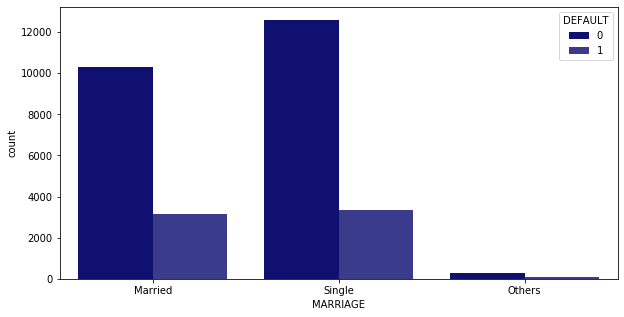

In [73]:
plt.figure(figsize = (10,5))
sns.countplot(data['MARRIAGE'], hue = data['DEFAULT'],)
plt.show()

### EDUCATION & DEFAULT:

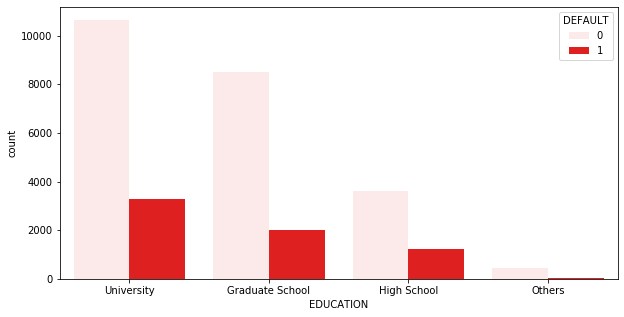

In [74]:
plt.figure(figsize = (10,5))
sns.countplot(data['EDUCATION'], hue = data['DEFAULT'],color='red')
plt.show()

In [75]:
u=data[data['EDUCATION']=='University']
g=data[data['EDUCATION']=='Graduate School']
h=data[data['EDUCATION']=='High School']

In [76]:
print('The Defaulter percentage of customer having university degree in their own population is:',round(u['DEFAULT'].sum()/u['DEFAULT'].count(),4)*100)
print('The Defaulter percentage of customer having graduate degree in their own population is:',round(g['DEFAULT'].sum()/g['DEFAULT'].count(),4)*100)
print('The Defaulter percentage of customer having high school degree in their own population is:',round(h['DEFAULT'].sum()/h['DEFAULT'].count(),4)*100)

The Defaulter percentage of customer having university degree in their own population is: 23.669999999999998
The Defaulter percentage of customer having graduate degree in their own population is: 19.21
The Defaulter percentage of customer having high school degree in their own population is: 25.169999999999998


### Customers having high school degree are more in defaulters.

In [77]:
ug=0
hs=0
gs=0
for i in data['EDUCATION']:
    if i=='University':
        ug=ug+1
    elif i=='Graduate School':
        gs=gs+1
    elif i=='High School':
        hs=hs+1
        
print('University=',ug/data['EDUCATION'].count()*100)
print('Graduate School=',gs/data['EDUCATION'].count()*100)
print('High School=',hs/data['EDUCATION'].count()*100)

University= 46.92209364908504
Graduate School= 35.36733046286329
High School= 16.146393972012916


### Customers having university degree majorly applied for the credit cards.

# Multivariate Analysis:

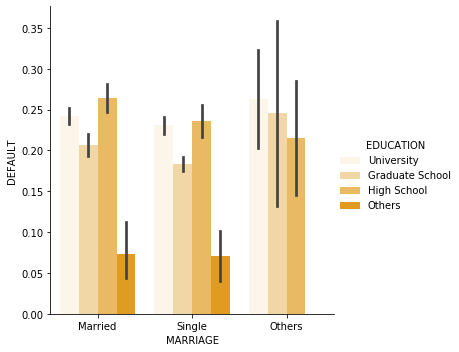

In [78]:
sns.catplot(x="MARRIAGE", y="DEFAULT", hue="EDUCATION", kind="bar", data=data,color='orange')
plt.show()

# FEATURE ENGINEERING:

In [79]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'September',
       'August', 'July', 'June', 'May', 'April', 'BILL_AMTSEPT', 'BILL_AMTAUG',
       'BILL_AMTJULY', 'BILL_AMTJUNE', 'BILL_AMTMAY', 'BILL_AMTAPR',
       'PAY_AMTSEPT', 'PAY_AMTAUG', 'PAY_AMTJULY', 'PAY_AMTJUNE', 'PAY_AMTMAY',
       'PAY_AMTAPR', 'DEFAULT'],
      dtype='object')

### Each Month Pending Amount:

In [80]:
data['Outstanding_balance_endAPR'] = data['BILL_AMTAPR']-data['PAY_AMTMAY']
data['Outstanding_balance_endMAY'] = data['Outstanding_balance_endAPR']+data['BILL_AMTMAY']-data['PAY_AMTJUNE']
data['Outstanding_balance_endJUNE'] = data['Outstanding_balance_endMAY']+data['BILL_AMTJUNE']-data['PAY_AMTJULY']
data['Outstanding_balance_endJULY'] = data['Outstanding_balance_endJUNE']+data['BILL_AMTJULY']-data['PAY_AMTAUG']
data['Outstanding_balance_endAUG'] = data['Outstanding_balance_endJULY']+data['BILL_AMTAUG']-data['PAY_AMTSEPT']

In [81]:
def build_features_ba_over_cl(df):

    bill_amount_column_list = ['BILL_AMTSEPT',
                               'BILL_AMTAUG',
                               'BILL_AMTJULY',
                               'BILL_AMTJUNE',
                               'BILL_AMTMAY',
                               'BILL_AMTAPR']

    df_new = df.copy()
    
    for i, ba in enumerate(bill_amount_column_list, 1):

        new_column_name = 'ba_over_cl_' + str(i)
        
        df_new[new_column_name] = \
            data[ba] / data['LIMIT_BAL']

    return df_new

In [82]:
new_df = build_features_ba_over_cl(data)
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,September,August,July,June,May,April,BILL_AMTSEPT,BILL_AMTAUG,BILL_AMTJULY,BILL_AMTJUNE,BILL_AMTMAY,BILL_AMTAPR,PAY_AMTSEPT,PAY_AMTAUG,PAY_AMTJULY,PAY_AMTJUNE,PAY_AMTMAY,PAY_AMTAPR,DEFAULT,Outstanding_balance_endAPR,Outstanding_balance_endMAY,Outstanding_balance_endJUNE,Outstanding_balance_endJULY,Outstanding_balance_endAUG,ba_over_cl_1,ba_over_cl_2,ba_over_cl_3,ba_over_cl_4,ba_over_cl_5,ba_over_cl_6
0,1,20000,0,University,Married,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,3102,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000
1,2,120000,0,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3261,5716,7988,9670,11395,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175
2,3,90000,0,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,14549,28497,41828,53887,66396,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767
3,4,50000,0,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,28478,56337,83451,130723,176956,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940
4,5,50000,1,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,18442,28588,39528,38682,42352,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620


In [83]:
def build_features_ba_less_pa_over_cl(df):

    bill_amount_column_list = ['BILL_AMTSEPT',
                               'BILL_AMTAUG',
                               'BILL_AMTJULY',
                               'BILL_AMTJUNE',
                               'BILL_AMTMAY',
                               'BILL_AMTAPR']

    pay_amount_column_list = ['PAY_AMTSEPT',
                              'PAY_AMTAUG',
                              'PAY_AMTJULY',
                              'PAY_AMTJUNE',
                              'PAY_AMTMAY',
                              'PAY_AMTAPR']

    df_new = df.copy()
    
    for i, (ba, pa) in enumerate(zip(bill_amount_column_list, 
                               pay_amount_column_list), 
                           1):

        new_column_name = 'ba_less_pa_over_cl_' + str(i)
        
        df_new[new_column_name] = \
            (new_df[ba] -new_df[pa])/ new_df['LIMIT_BAL']

    return df_new

In [84]:
new_df = build_features_ba_less_pa_over_cl(new_df)
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,September,August,July,June,May,April,BILL_AMTSEPT,BILL_AMTAUG,BILL_AMTJULY,BILL_AMTJUNE,BILL_AMTMAY,BILL_AMTAPR,PAY_AMTSEPT,PAY_AMTAUG,PAY_AMTJULY,PAY_AMTJUNE,PAY_AMTMAY,PAY_AMTAPR,DEFAULT,Outstanding_balance_endAPR,Outstanding_balance_endMAY,Outstanding_balance_endJUNE,Outstanding_balance_endJULY,Outstanding_balance_endAUG,ba_over_cl_1,ba_over_cl_2,ba_over_cl_3,ba_over_cl_4,ba_over_cl_5,ba_over_cl_6,ba_less_pa_over_cl_1,ba_less_pa_over_cl_2,ba_less_pa_over_cl_3,ba_less_pa_over_cl_4,ba_less_pa_over_cl_5,ba_less_pa_over_cl_6
0,1,20000,0,University,Married,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,3102,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000
1,2,120000,0,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3261,5716,7988,9670,11395,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508
2,3,90000,0,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,14549,28497,41828,53887,66396,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211
3,4,50000,0,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,28478,56337,83451,130723,176956,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940
4,5,50000,1,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,18442,28588,39528,38682,42352,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040


In [85]:
new_df.rename(columns={'ba_less_pa_over_cl_1':'Remaining_bal_Sept','ba_less_pa_over_cl_2':'Remaining_bal_Aug',
                       'ba_less_pa_over_cl_3':'Remaining_bal_July','ba_less_pa_over_cl_4':'Remaining_bal_June',
                       'ba_less_pa_over_cl_5':'Remaining_bal_May','ba_less_pa_over_cl_6':'Remaining_bal_Apr'},inplace=True)

In [86]:
new_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'September',
       'August', 'July', 'June', 'May', 'April', 'BILL_AMTSEPT', 'BILL_AMTAUG',
       'BILL_AMTJULY', 'BILL_AMTJUNE', 'BILL_AMTMAY', 'BILL_AMTAPR',
       'PAY_AMTSEPT', 'PAY_AMTAUG', 'PAY_AMTJULY', 'PAY_AMTJUNE', 'PAY_AMTMAY',
       'PAY_AMTAPR', 'DEFAULT', 'Outstanding_balance_endAPR',
       'Outstanding_balance_endMAY', 'Outstanding_balance_endJUNE',
       'Outstanding_balance_endJULY', 'Outstanding_balance_endAUG',
       'ba_over_cl_1', 'ba_over_cl_2', 'ba_over_cl_3', 'ba_over_cl_4',
       'ba_over_cl_5', 'ba_over_cl_6', 'Remaining_bal_Sept',
       'Remaining_bal_Aug', 'Remaining_bal_July', 'Remaining_bal_June',
       'Remaining_bal_May', 'Remaining_bal_Apr'],
      dtype='object')

In [87]:
new_df.isnull().sum()

ID                             0
LIMIT_BAL                      0
SEX                            0
EDUCATION                      0
MARRIAGE                       0
AGE                            0
September                      0
August                         0
July                           0
June                           0
May                            0
April                          0
BILL_AMTSEPT                   0
BILL_AMTAUG                    0
BILL_AMTJULY                   0
BILL_AMTJUNE                   0
BILL_AMTMAY                    0
BILL_AMTAPR                    0
PAY_AMTSEPT                    0
PAY_AMTAUG                     0
PAY_AMTJULY                    0
PAY_AMTJUNE                    0
PAY_AMTMAY                     0
PAY_AMTAPR                     0
DEFAULT                        0
Outstanding_balance_endAPR     0
Outstanding_balance_endMAY     0
Outstanding_balance_endJUNE    0
Outstanding_balance_endJULY    0
Outstanding_balance_endAUG     0
ba_over_cl

In [88]:
bill_amt_list =['BILL_AMTSEPT', 
                'BILL_AMTAUG', 
                'BILL_AMTJULY', 
                'BILL_AMTJUNE', 
                'BILL_AMTMAY', 
                'BILL_AMTAPR']

label_dict ={'BILL_AMTSEPT': 'September, 2005',  
             'BILL_AMTAUG': 'August, 2005',
             'BILL_AMTJULY': 'July, 2005', 
             'BILL_AMTJUNE': 'June, 2005',  
             'BILL_AMTMAY': 'May, 2005', 
             'BILL_AMTAPR': 'April, 2005'}

c_dict ={'BILL_AMTSEPT': 'ba_over_cl_1',  
         'BILL_AMTAUG': 'ba_over_cl_2', 
         'BILL_AMTJULY': 'ba_over_cl_3',  
         'BILL_AMTJUNE': 'ba_over_cl_4', 
         'BILL_AMTMAY': 'ba_over_cl_5',  
         'BILL_AMTAPR': 'ba_over_cl_6'}

c_dict_binned ={'BILL_AMTSEPT': 'BILL_AMT1_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMTAUG': 'BILL_AMT2_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMTJULY': 'BILL_AMT3_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMTJUNE': 'BILL_AMT4_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMTMAY': 'BILL_AMT5_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMTAPR': 'BILL_AMT6_OVER_LIMIT_BAL_BINNED'}


In [89]:
new_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'September',
       'August', 'July', 'June', 'May', 'April', 'BILL_AMTSEPT', 'BILL_AMTAUG',
       'BILL_AMTJULY', 'BILL_AMTJUNE', 'BILL_AMTMAY', 'BILL_AMTAPR',
       'PAY_AMTSEPT', 'PAY_AMTAUG', 'PAY_AMTJULY', 'PAY_AMTJUNE', 'PAY_AMTMAY',
       'PAY_AMTAPR', 'DEFAULT', 'Outstanding_balance_endAPR',
       'Outstanding_balance_endMAY', 'Outstanding_balance_endJUNE',
       'Outstanding_balance_endJULY', 'Outstanding_balance_endAUG',
       'ba_over_cl_1', 'ba_over_cl_2', 'ba_over_cl_3', 'ba_over_cl_4',
       'ba_over_cl_5', 'ba_over_cl_6', 'Remaining_bal_Sept',
       'Remaining_bal_Aug', 'Remaining_bal_July', 'Remaining_bal_June',
       'Remaining_bal_May', 'Remaining_bal_Apr'],
      dtype='object')

In [90]:
df_wrangled_copy = new_df.copy()

for item in bill_amt_list:
    df_wrangled_copy[c_dict.get(item)] = df_wrangled_copy[item].div(df_wrangled_copy['LIMIT_BAL'],
                                                                              axis='index')

min_set = set()
max_set = set()

for item in bill_amt_list:
    min_set.add(df_wrangled_copy[c_dict.get(item)].min())
    max_set.add(df_wrangled_copy[c_dict.get(item)].max())
    
step = 0.1
    
start = round((min(min_set) - step), 1)
stop = round((max(max_set) + step), 1)

In [91]:
bins = []
for i in float_range(start, stop, step):
    bins.append(round(i,1))

group_names = bins[0:(len(bins)-1)]
group_names

for item in bill_amt_list:
    categories = pd.cut(df_wrangled_copy[c_dict.get(item)], 
                        bins=bins, 
                        labels=group_names)
    df_wrangled_copy[c_dict_binned.get(item)] = categories

Text(0.5, 0, 'Ratio of (Bill Amount / Credit Limit)')

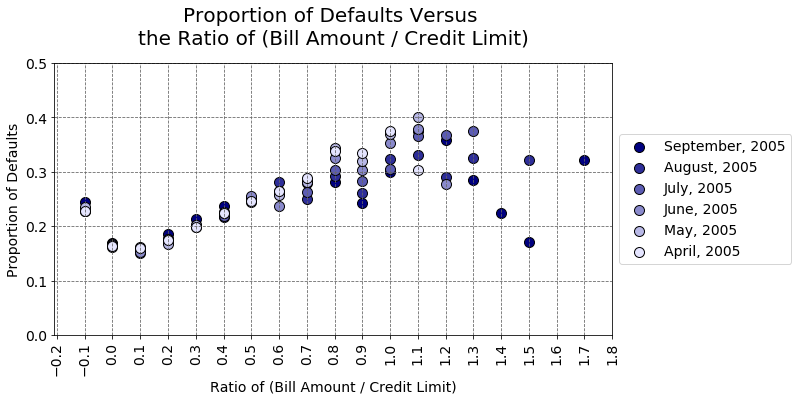

In [92]:

bill_amt_dfs = {}

for item in bill_amt_list:
    bill_amt_dfs[item] = df_wrangled_copy.groupby([c_dict_binned.get(item),'DEFAULT']).size().unstack()
    # Require at least 50 total observations
    
    bill_amt_dfs[item] = bill_amt_dfs[item][bill_amt_dfs[item].sum(axis=1)>25]
    
    # Calculate proportions
    bill_amt_dfs[item] = bill_amt_dfs[item].div(bill_amt_dfs[item].sum(axis=1), axis='index')
    bill_amt_dfs[item].sort_index(ascending=False, inplace=True)
        
# plot

sns.set_palette(sns.light_palette("navy", reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(10,5))

for item in bill_amt_list:
    ax.scatter(x=bill_amt_dfs[item].index, 
               y=bill_amt_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)          
    
ax.set_ylim([0, 0.5])

xmin, xmax = ax.get_xlim()

step = 0.1
start = round((xmin), 1)
stop = round((xmax + step), 1)

ticks = []
for i in float_range(start, stop, step):
    ticks.append(round(i,1))

plt.xticks(ticks, rotation=90)

ax.grid(b=True, which='major', color='0.4', linestyle='--')

lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')
        
sns.set_palette(sns.light_palette("navy", reverse=True))
plt.title('Proportion of Defaults Versus \nthe Ratio of (Bill Amount / Credit Limit)', 
          fontsize=20,
          y = 1.05)   

plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Ratio of (Bill Amount / Credit Limit)', fontsize=14)

In [93]:
bill_amt_list =['BILL_AMTSEPT', 
                'BILL_AMTAUG', 
                'BILL_AMTJULY', 
                'BILL_AMTJUNE', 
                'BILL_AMTMAY', 
                'BILL_AMTAPR']

label_dict ={'BILL_AMTSEPT': 'September, 2005',  
             'BILL_AMTAUG': 'August, 2005',
             'BILL_AMTJULY': 'July, 2005', 
             'BILL_AMTJUNE': 'June, 2005',  
             'BILL_AMTMAY': 'May, 2005', 
             'BILL_AMTAPR': 'April, 2005'}

c_dict ={'BILL_AMTSEPT': 'ba_over_cl_1',  
         'BILL_AMTAUG': 'ba_over_cl_2', 
         'BILL_AMTJULY': 'ba_over_cl_3',  
         'BILL_AMTJUNE': 'ba_over_cl_4', 
         'BILL_AMTMAY': 'ba_over_cl_5',  
         'BILL_AMTAPR': 'ba_over_cl_6'}

c_dict_binned ={'BILL_AMTSEPT': 'BILL_AMT1_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMTAUG': 'BILL_AMT2_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMTJULY': 'BILL_AMT3_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMTJUNE': 'BILL_AMT4_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMTMAY': 'BILL_AMT5_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMTAPR': 'BILL_AMT6_OVER_LIMIT_BAL_BINNED'}


In [94]:
new_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'September',
       'August', 'July', 'June', 'May', 'April', 'BILL_AMTSEPT', 'BILL_AMTAUG',
       'BILL_AMTJULY', 'BILL_AMTJUNE', 'BILL_AMTMAY', 'BILL_AMTAPR',
       'PAY_AMTSEPT', 'PAY_AMTAUG', 'PAY_AMTJULY', 'PAY_AMTJUNE', 'PAY_AMTMAY',
       'PAY_AMTAPR', 'DEFAULT', 'Outstanding_balance_endAPR',
       'Outstanding_balance_endMAY', 'Outstanding_balance_endJUNE',
       'Outstanding_balance_endJULY', 'Outstanding_balance_endAUG',
       'ba_over_cl_1', 'ba_over_cl_2', 'ba_over_cl_3', 'ba_over_cl_4',
       'ba_over_cl_5', 'ba_over_cl_6', 'Remaining_bal_Sept',
       'Remaining_bal_Aug', 'Remaining_bal_July', 'Remaining_bal_June',
       'Remaining_bal_May', 'Remaining_bal_Apr'],
      dtype='object')

Text(0.5, 0, 'Ratio of ((Bill Amount - Pay Amount) / Credit Limit)')

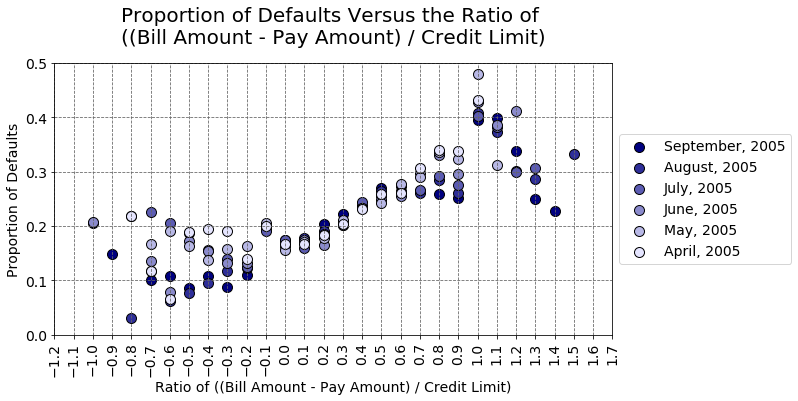

In [95]:
bill_amt_list =['BILL_AMTSEPT', 
                'BILL_AMTAUG', 
                'BILL_AMTJULY', 
                'BILL_AMTJUNE', 
                'BILL_AMTMAY', 
                'BILL_AMTAPR']

bill_pay_dict ={'BILL_AMTSEPT': 'PAY_AMTSEPT',  
                'BILL_AMTAUG': 'PAY_AMTAUG', 
                'BILL_AMTJULY': 'PAY_AMTJULY',  
                'BILL_AMTJUNE': 'PAY_AMTJUNE',  
                'BILL_AMTMAY': 'PAY_AMTMAY', 
                'BILL_AMTAPR': 'PAY_AMTAPR'}

label_dict ={'BILL_AMTSEPT': 'September, 2005',  
             'BILL_AMTAUG': 'August, 2005',
             'BILL_AMTJULY': 'July, 2005', 
             'BILL_AMTJUNE': 'June, 2005',  
             'BILL_AMTMAY': 'May, 2005', 
             'BILL_AMTAPR': 'April, 2005'}


c_dict ={'BILL_AMTSEPT': 'Remaining_bal_Sept',  
         'BILL_AMTAUG': 'Remaining_bal_Aug', 
         'BILL_AMTJULY': 'Remaining_bal_July',  
         'BILL_AMTJUNE': 'Remaining_bal_June', 
         'BILL_AMTMAY': 'Remaining_bal_May',  
         'BILL_AMTAPR': 'Remaining_bal_apr'}

c_dict_binned ={'BILL_AMTSEPT': 'BILL_AMT1_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMTAUG': 'BILL_AMT2_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMTJULY': 'BILL_AMT3_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMTJUNE': 'BILL_AMT4_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMTMAY': 'BILL_AMT5_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMTAPR': 'BILL_AMT6_OVER_LIMIT_BAL_BINNED'}

df_wrangled_copy =new_df.copy()

for item in bill_amt_list:
    df_wrangled_copy[c_dict.get(item)] = (df_wrangled_copy[item] - df_wrangled_copy[bill_pay_dict.get(item)]).div(df_wrangled_copy['LIMIT_BAL'],
                                                                                                                  axis='index')

min_set = set()
max_set = set()

for item in bill_amt_list:
    min_set.add(df_wrangled_copy[c_dict.get(item)].min())
    max_set.add(df_wrangled_copy[c_dict.get(item)].max())
    
step = 0.1
    
start = round((min(min_set) - step), 1)
stop = round((max(max_set) + step), 1)

bins = []
for i in float_range(start, stop, step):
    bins.append(round(i,1))

group_names = bins[0:(len(bins)-1)]
group_names

for item in bill_amt_list:
    categories = pd.cut(df_wrangled_copy[c_dict.get(item)], 
                        bins=bins, 
                        labels=group_names)
    df_wrangled_copy[c_dict_binned.get(item)] = categories

bill_amt_dfs = {}

for item in bill_amt_list:
    bill_amt_dfs[item] = df_wrangled_copy.groupby([c_dict_binned.get(item),'DEFAULT']).size().unstack()
    # Require at least 50 total observations
    
    bill_amt_dfs[item] = bill_amt_dfs[item][bill_amt_dfs[item].sum(axis=1)>25]
    
    # Calculate proportions
    bill_amt_dfs[item] = bill_amt_dfs[item].div(bill_amt_dfs[item].sum(axis=1), axis='index')
    bill_amt_dfs[item].sort_index(ascending=False, inplace=True)
        
# plot

sns.set_palette(sns.light_palette("navy", reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(10,5))

for item in bill_amt_list:
    ax.scatter(x=bill_amt_dfs[item].index, 
               y=bill_amt_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)          
    
ax.set_ylim([0, 0.5])

xmin, xmax = ax.get_xlim()

step = 0.1
start = round((xmin), 1)
stop = round((xmax + step), 1)

ticks = []
for i in float_range(start, stop, step):
    ticks.append(round(i,1))

plt.xticks(ticks, rotation=90)

ax.grid(b=True, which='major', color='0.4', linestyle='--')

lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')
        
sns.set_palette(sns.light_palette("navy", reverse=True))
        
#plt.title('Proportion of Defaults Versus the Ratio of \n((Bill Amount - Pay Amount) / Credit Limit)', 
#          fontsize=20)     

plt.title('Proportion of Defaults Versus the Ratio of \n((Bill Amount - Pay Amount) / Credit Limit)', 
          fontsize=20,
          y = 1.05)     

plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Ratio of ((Bill Amount - Pay Amount) / Credit Limit)', fontsize=14)

In [96]:
new_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'September',
       'August', 'July', 'June', 'May', 'April', 'BILL_AMTSEPT', 'BILL_AMTAUG',
       'BILL_AMTJULY', 'BILL_AMTJUNE', 'BILL_AMTMAY', 'BILL_AMTAPR',
       'PAY_AMTSEPT', 'PAY_AMTAUG', 'PAY_AMTJULY', 'PAY_AMTJUNE', 'PAY_AMTMAY',
       'PAY_AMTAPR', 'DEFAULT', 'Outstanding_balance_endAPR',
       'Outstanding_balance_endMAY', 'Outstanding_balance_endJUNE',
       'Outstanding_balance_endJULY', 'Outstanding_balance_endAUG',
       'ba_over_cl_1', 'ba_over_cl_2', 'ba_over_cl_3', 'ba_over_cl_4',
       'ba_over_cl_5', 'ba_over_cl_6', 'Remaining_bal_Sept',
       'Remaining_bal_Aug', 'Remaining_bal_July', 'Remaining_bal_June',
       'Remaining_bal_May', 'Remaining_bal_Apr'],
      dtype='object')

In [97]:
new_df.shape

(29728, 42)

In [98]:
new_df.drop(columns = ['ID','LIMIT_BAL','BILL_AMTSEPT', 'BILL_AMTAUG',
       'BILL_AMTJULY', 'BILL_AMTJUNE', 'BILL_AMTMAY', 'BILL_AMTAPR',
       'PAY_AMTSEPT', 'PAY_AMTAUG', 'PAY_AMTJULY', 'PAY_AMTJUNE', 'PAY_AMTMAY',
       'PAY_AMTAPR'], inplace = True)

In [99]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29728 entries, 0 to 29999
Data columns (total 28 columns):
SEX                            29728 non-null int64
EDUCATION                      29728 non-null object
MARRIAGE                       29728 non-null object
AGE                            29728 non-null int64
September                      29728 non-null int64
August                         29728 non-null int64
July                           29728 non-null int64
June                           29728 non-null int64
May                            29728 non-null int64
April                          29728 non-null int64
DEFAULT                        29728 non-null int64
Outstanding_balance_endAPR     29728 non-null int64
Outstanding_balance_endMAY     29728 non-null int64
Outstanding_balance_endJUNE    29728 non-null int64
Outstanding_balance_endJULY    29728 non-null int64
Outstanding_balance_endAUG     29728 non-null int64
ba_over_cl_1                   29728 non-null float64
ba_

In [100]:
new_df = pd.get_dummies(new_df,drop_first=True)

In [101]:
new_df.shape

(29728, 31)

# Data Preparation and Model Building

In [102]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [103]:
# Putting feature variable to X
X = new_df.drop('DEFAULT',axis=1)

# Putting response variable to y
y = new_df['DEFAULT']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [104]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20809 entries, 17410 to 2759
Data columns (total 30 columns):
SEX                            20809 non-null int64
AGE                            20809 non-null int64
September                      20809 non-null int64
August                         20809 non-null int64
July                           20809 non-null int64
June                           20809 non-null int64
May                            20809 non-null int64
April                          20809 non-null int64
Outstanding_balance_endAPR     20809 non-null int64
Outstanding_balance_endMAY     20809 non-null int64
Outstanding_balance_endJUNE    20809 non-null int64
Outstanding_balance_endJULY    20809 non-null int64
Outstanding_balance_endAUG     20809 non-null int64
ba_over_cl_1                   20809 non-null float64
ba_over_cl_2                   20809 non-null float64
ba_over_cl_3                   20809 non-null float64
ba_over_cl_4                   20809 non-null floa

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression:

In [106]:
import statsmodels.api as sm
#Build Logit Model
logit = sm.Logit(y,X)

# fit the model
model_logistic = logit.fit()

# Prining Logistic Regression model results 
model_logistic.summary2()

Optimization terminated successfully.
         Current function value: 0.463257
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.122     
Dependent Variable:      DEFAULT             AIC:                 27603.3873
Date:                    2020-05-28 12:35    BIC:                 27852.3827
No. Observations:        29728               Log-Likelihood:      -13772.   
Df Model:                29                  LL-Null:             -15693.   
Df Residuals:            29698               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SEX                          0.1198   0.0312   3.8372 0.0001  0.0586  0.1809
AGE                         -0.0236   0.0009 -25.6887 0.0000 -0.0254 -0.0218
September                    0.6244   0.0193  32.3287 0.0000  0.5866  0.6623
August                       0.1315   0.0224   5.8639 0.0000  0.0875  0.1754
July                         0.0888   0.0245   3.6181 0.0003  0.0407  0.1369
June                         0.0669   0.0273   2.4525 0.0142  0.0134  0.1203
May                          0.0725   0.0292   2.4806 0.0131  0.0152  0.1298
April                        0.0668   0.0251   2.6664 0.0077  0.0177  0.1159
Outstanding_balance_endAPR  -0.0000   0.0000  -1.5824 0.1136 -0.0000  0.0000
Outstanding_balance_endMAY   0.0000   0.0000   1.0945 0.2738 -0.0000  0.0000
Outstanding_balance_endJUNE  0.0000   0.0000   0.1403 0.8884 -0.0000  0.0000
Outstanding_balance_endJULY -0.0000   0.0000  -1.3446 0.1788 -0.0000  0.0000
Outstanding_balance_endAUG   0.0000   0.0000   1.1462 0.2517 -0.0000  0.0000
ba_over_cl_1                -1.2140   0.3196  -3.7985 0.0001 -1.8404 -0.5876
ba_over_cl_2                -1.2087   0.3985  -3.0330 0.0024 -1.9898 -0.4276
ba_over_cl_3                 0.1659   0.3650   0.4544 0.6495 -0.5495  0.8812
ba_over_cl_4                 0.2623   0.3428   0.7652 0.4442 -0.4095  0.9341
ba_over_cl_5                -1.2285   0.3764  -3.2637 0.0011 -1.9663 -0.4908
ba_over_cl_6                 0.2135   0.2455   0.8696 0.3845 -0.2677  0.6948
Remaining_bal_Sept           0.5451   0.2410   2.2620 0.0237  0.0728  1.0175
Remaining_bal_Aug            1.3069   0.2787   4.6898 0.0000  0.7607  1.8530
Remaining_bal_July           0.2349   0.2478   0.9479 0.3432 -0.2508  0.7206
Remaining_bal_June          -0.0306   0.2294  -0.1335 0.8938 -0.4803  0.4190
Remaining_bal_May            0.7975   0.2502   3.1872 0.0014  0.3071  1.2879
Remaining_bal_Apr            0.1886   0.1775   1.0624 0.2880 -0.1593  0.5366
EDUCATION_High School       -0.0443   0.0475  -0.9326 0.3510 -0.1373  0.0488
EDUCATION_Others            -1.1796   0.1880  -6.2733 0.0000 -1.5482 -0.8111
EDUCATION_University        -0.1587   0.0340  -4.6699 0.0000 -0.2253 -0.0921
MARRIAGE_Others             -0.0974   0.1347  -0.7231 0.4696 -0.3613  0.1665
MARRIAGE_Single             -0.4821   0.0282 -17.1084 0.0000 -0.5374 -0.4269
============================================================================

"""

## Logistic Regression:

In [107]:
#Fitting logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_test, y_pred)
print(cm_logistic)

[[6718  237]
 [1446  518]]


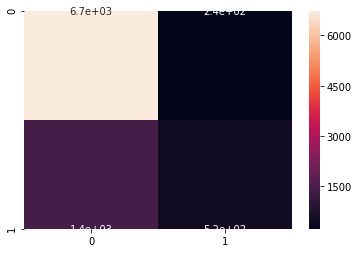

In [110]:
sns.heatmap(cm_logistic,annot=True)
plt.show()

In [111]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6955
           1       0.69      0.26      0.38      1964

    accuracy                           0.81      8919
   macro avg       0.75      0.61      0.63      8919
weighted avg       0.79      0.81      0.78      8919



In [112]:
from sklearn import metrics
print('Accuracy score is:',np.round(metrics.accuracy_score(y_test, y_pred),4))

Accuracy score is: 0.8113


In [113]:
print('F1 score:', np.round(metrics.f1_score(y_test, y_pred),4))
print('Recall:', np.round(metrics.recall_score(y_test, y_pred),4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred),4))

F1 score: 0.381
Recall: 0.2637
Precision: 0.6861


In [114]:
y_pred_proba =classifier.predict_proba(X_test)
y_pred_proba

array([[0.90093771, 0.09906229],
       [0.7896225 , 0.2103775 ],
       [0.78310697, 0.21689303],
       ...,
       [0.76966052, 0.23033948],
       [0.60366324, 0.39633676],
       [0.7999659 , 0.2000341 ]])

In [115]:
probs = y_pred_proba[:,1]

In [116]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' %auc)

AUC: 0.71


In [117]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
print(fpr)
print(tpr)
print(thresholds)

[0.00000000e+00 0.00000000e+00 1.43781452e-04 ... 9.98849748e-01
 1.00000000e+00 1.00000000e+00]
[0.00000000e+00 5.09164969e-04 5.09164969e-04 ... 9.99490835e-01
 9.99490835e-01 1.00000000e+00]
[1.99794022 0.99794022 0.97940701 ... 0.01844876 0.0085643  0.0037215 ]


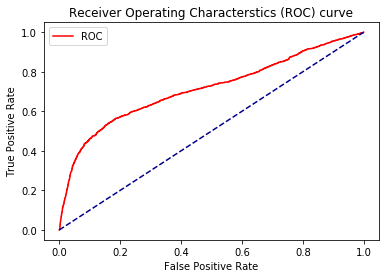

In [118]:
plt.plot(fpr,tpr, color = 'red', label = 'ROC')
plt.plot([0,1],[0,1], color =  'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

### Hyperparamter tuning for Logistic Regression

In [119]:
##Grid search cross validation
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=RandomizedSearchCV(classifier,params,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': 0.1}
accuracy : 0.8133980489211399


## KNN

In [120]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print('Prediction: {}'.format(prediction))

Prediction: [0 0 0 ... 0 0 0]


In [121]:
print('With KNN accuracy is: ',np.round(knn.score(X_test,y_test),4)) # accuracy

With KNN accuracy is:  0.7828


In [122]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn= confusion_matrix(y_test, prediction)
print(cm_knn)

[[6367  588]
 [1349  615]]


In [123]:
print('F1 score:', np.round(metrics.f1_score(y_test, prediction),4))
print('Recall:', np.round(metrics.recall_score(y_test, prediction),4))
print('Precision:',np.round( metrics.precision_score(y_test, prediction),4))

F1 score: 0.3884
Recall: 0.3131
Precision: 0.5112


### Hyperparameter tuning of KNN

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
param = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier(n_neighbors=21, p=2, metric='minkowski')
knn_cv = RandomizedSearchCV(knn, param, cv=3) # GridSearchCV
knn_cv.fit(X_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn_cv.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn_cv.score(X_test, y_test)))
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

The accuracy of the knn classifier is 0.82 out of 1 on training data
The accuracy of the knn classifier is 0.81 out of 1 on test data
Tuned hyperparameter k: {'n_neighbors': 22}
Best score: 0.808976885001682


### Model complexity

In [125]:
neigh = np.arange(1,25)
train_accuracy = []
test_accuracy = []
for i in neigh:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

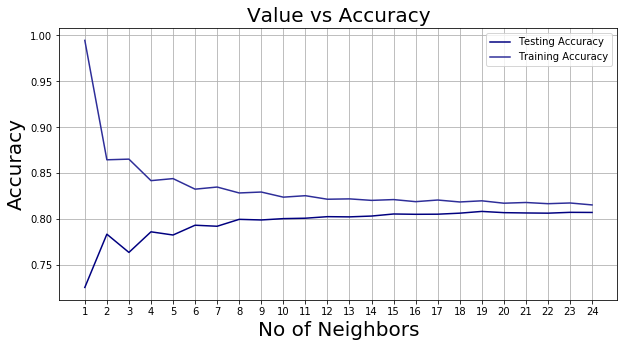

Best accuracy is 0.8084987106177822 with k = 19


In [126]:
plt.figure(figsize = [10,5])
plt.plot(neigh, test_accuracy, label = 'Testing Accuracy')
plt.plot(neigh,train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value vs Accuracy', fontsize = 20)
plt.xlabel('No of Neighbors',fontsize = 20)
plt.ylabel('Accuracy',fontsize = 20)
plt.xticks(neigh)
plt.grid()
plt.show()
print('Best accuracy is {} with k = {}'.format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

In [127]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print('Prediction: {}'.format(prediction))

Prediction: [0 0 0 ... 0 0 0]


In [128]:
print('With KNN accuracy is: ',knn.score(X_test,y_test)) # accuracy
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn= confusion_matrix(y_test, prediction)
print(cm_knn)
print(classification_report(y_test, prediction))

With KNN accuracy is:  0.8068169077250813
[[6650  305]
 [1418  546]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6955
           1       0.64      0.28      0.39      1964

    accuracy                           0.81      8919
   macro avg       0.73      0.62      0.64      8919
weighted avg       0.78      0.81      0.78      8919



## Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model=dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)

In [130]:
print('With Decision tree accuracy is: ',np.round(dt.score(X_test,y_test),4)) # accuracy

With Decision tree accuracy is:  0.7299


In [131]:
print('F1 score:', np.round(metrics.f1_score(y_test, pred_dt),4))
print('Recall:', np.round(metrics.recall_score(y_test, pred_dt),4))
print('Precision:',np.round( metrics.precision_score(y_test, pred_dt),4))

F1 score: 0.4015
Recall: 0.4114
Precision: 0.392


In [132]:
from sklearn.svm import SVC
svm=SVC()
model=svm.fit(X_train,y_train)
pred_svm=svm.predict(X_test)

In [133]:
print('With Support Vector Machine accuracy is: ',np.round(metrics.accuracy_score(pred_svm,y_test),4)) # accuracy

With Support Vector Machine accuracy is:  0.8186


In [134]:
print('F1 score:', np.round(metrics.f1_score(y_test, pred_svm),4))
print('Recall:', np.round(metrics.recall_score(y_test, pred_svm),4))
print('Precision:',np.round( metrics.precision_score(y_test, pred_svm),4))

F1 score: 0.4549
Recall: 0.3437
Precision: 0.6723


## Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)
predictions=rfc.predict(X_test)

In [136]:
print(np.round(metrics.accuracy_score(y_test,predictions),4))

0.8047


In [137]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6955
           1       0.61      0.32      0.42      1964

    accuracy                           0.80      8919
   macro avg       0.72      0.63      0.65      8919
weighted avg       0.78      0.80      0.78      8919



In [138]:
print('F1 score:', np.round(metrics.f1_score(y_test, predictions),4))
print('Recall:',np.round(metrics.recall_score(y_test, predictions),4))
print('Precision:', np.round(metrics.precision_score(y_test, predictions),4))

F1 score: 0.4205
Recall: 0.3218
Precision: 0.6065


### Hyperparametr Tuning

In [139]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rc = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
# Fit the grid search to the data
rc.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [141]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rc.best_score_,'using',rc.best_params_)

We can get accuracy of 0.8222403767600558 using {'n_estimators': 300, 'min_samples_split': 400, 'min_samples_leaf': 300, 'max_features': 10, 'max_depth': 4}


In [142]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=300, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

## Logistic Regression with PCA:

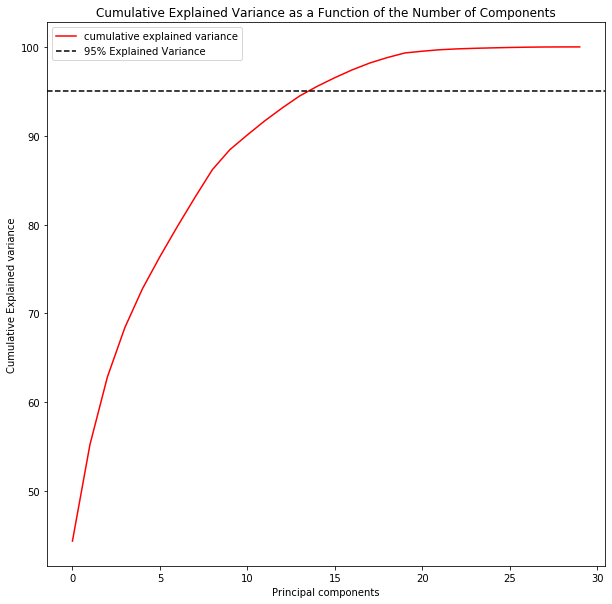

In [144]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')
plt.show()

In [145]:
pca = PCA(0.95)
pca.fit(X_train)
X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

In [146]:
pca.n_components_

15

In [147]:
#Fitting logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
y_pred_pca = classifier.predict(X_test_pca)
y_pred_pca

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logistic_pca = confusion_matrix(y_test, y_pred_pca)
print(cm_logistic_pca)

[[6700  255]
 [1443  521]]


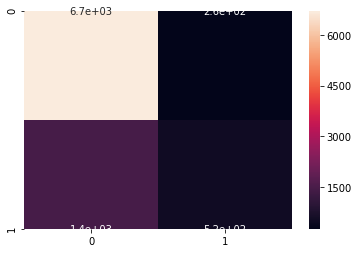

In [150]:
sns.heatmap(cm_logistic_pca,annot=True)
plt.show()

In [151]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6955
           1       0.67      0.27      0.38      1964

    accuracy                           0.81      8919
   macro avg       0.75      0.61      0.63      8919
weighted avg       0.79      0.81      0.78      8919



In [152]:
from sklearn import metrics
print('Accuracy score is:',np.round(metrics.accuracy_score(y_test, y_pred_pca),4))

Accuracy score is: 0.8096


In [153]:
y_pred_proba_pca =classifier.predict_proba(X_test_pca)
y_pred_proba_pca

array([[0.90370359, 0.09629641],
       [0.7858971 , 0.2141029 ],
       [0.78620749, 0.21379251],
       ...,
       [0.77533915, 0.22466085],
       [0.65930604, 0.34069396],
       [0.82606068, 0.17393932]])

In [154]:
probs_pca = y_pred_proba_pca[:,1]

In [155]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_pca = roc_auc_score(y_test, probs_pca)
print('AUC: %.2f' %auc_pca)

AUC: 0.71


In [156]:
fpr_pca, tpr_pca, thresholds_pca = metrics.roc_curve(y_test,probs_pca)
print(fpr_pca)
print(tpr_pca)
print(thresholds_pca)

[0.00000000e+00 0.00000000e+00 1.43781452e-04 ... 9.97843278e-01
 1.00000000e+00 1.00000000e+00]
[0.00000000e+00 5.09164969e-04 5.09164969e-04 ... 9.98981670e-01
 9.98981670e-01 1.00000000e+00]
[1.99755141 0.99755141 0.97892227 ... 0.02654893 0.02204262 0.02079448]


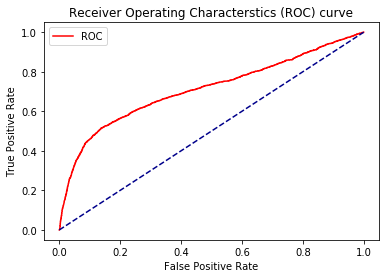

In [157]:
plt.plot(fpr_pca,tpr_pca, color = 'red', label = 'ROC')
plt.plot([0,1],[0,1], color =  'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

In [158]:
print('F1 score:',np.round( metrics.f1_score(y_test, y_pred_pca),4))
print('Recall:', np.round(metrics.recall_score(y_test, y_pred_pca),4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred_pca),4))

F1 score: 0.3803
Recall: 0.2653
Precision: 0.6714


## KNN with PCA:

In [159]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca,y_train)
prediction_pca = knn.predict(X_test_pca)
print('Prediction: {}'.format(prediction))

Prediction: [0 0 0 ... 0 0 0]


In [160]:
print('With KNN accuracy is: ',np.round(knn.score(X_test_pca,y_test),4)) # accuracy

With KNN accuracy is:  0.7851


In [161]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn_pca= confusion_matrix(y_test, prediction_pca)
print(cm_knn_pca)

[[6368  587]
 [1330  634]]


In [162]:
print(classification_report(y_test, prediction_pca))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6955
           1       0.52      0.32      0.40      1964

    accuracy                           0.79      8919
   macro avg       0.67      0.62      0.63      8919
weighted avg       0.76      0.79      0.77      8919



In [163]:
print('F1 score:', np.round(metrics.f1_score(y_test, prediction_pca),4))
print('Recall:',np.round( metrics.recall_score(y_test, prediction_pca),4))
print('Precision:', np.round(metrics.precision_score(y_test, prediction_pca),4))

F1 score: 0.3981
Recall: 0.3228
Precision: 0.5192


## Decision tree with PCA

In [164]:
model=dt.fit(X_train_pca,y_train)
pred_dt_pca=dt.predict(X_test_pca)

In [165]:
print('With Decision tree accuracy is: ',np.round(metrics.accuracy_score(pred_dt_pca,y_test),4)) # accuracy

With Decision tree accuracy is:  0.7204


In [166]:
print('F1 score:', np.round(metrics.f1_score(y_test, pred_dt_pca),4))
print('Recall:',np.round( metrics.recall_score(y_test, pred_dt_pca),4))
print('Precision:', np.round(metrics.precision_score(y_test, pred_dt_pca),4))

F1 score: 0.3808
Recall: 0.3905
Precision: 0.3716


### SVM with PCA

In [167]:
model=svm.fit(X_train_pca,y_train)
pred_svm_pca=svm.predict(X_test_pca)

In [168]:
print('With SVM accuracy is: ',np.round(metrics.accuracy_score(pred_svm_pca,y_test),4)) # accuracy

With SVM accuracy is:  0.8124


In [169]:
print('F1 score:', np.round(metrics.f1_score(y_test, pred_svm_pca),4))
print('Recall:',np.round( metrics.recall_score(y_test, pred_svm_pca),4))
print('Precision:', np.round(metrics.precision_score(y_test,pred_svm_pca),4))

F1 score: 0.4502
Recall: 0.3488
Precision: 0.6348


## Random Forest with PCA

In [170]:
rfc=RandomForestClassifier()
model=rfc.fit(X_train_pca,y_train)
predictions_pca=rfc.predict(X_test_pca)

In [171]:
print('With Random Forest accuracy is: ',np.round(rfc.score(X_test_pca,y_test),4)) # accuracy

With Random Forest accuracy is:  0.7944


In [172]:
print('F1 score:', np.round(metrics.f1_score(y_test, predictions_pca),4))
print('Recall:',np.round( metrics.recall_score(y_test, predictions_pca),4))
print('Precision:', np.round(metrics.precision_score(y_test, predictions_pca),4))

F1 score: 0.3883
Recall: 0.2963
Precision: 0.5629


# 11. Output

### Accuracy scores without PCA:

In [173]:
Accuracy_Score_without_pca = pd.DataFrame({'Models':['Logistic','KNN','Decision Tree','SVM','Random Forest'],
                                       'Accuracy score':[81.13,78.28,73.07,81.86,79.9],
                                      'Recall':[26.37,31.31,40.89,34.37,31.92],
                                      'Precision':[68.61,51.12,39.29,67.23,57.89],
                                      'F1-score':[38.10,38.84,40.07,45.49,41.16]})

In [174]:
print('The Metrics with Default Values are:')
Accuracy_Score_without_pca

The Metrics with Default Values are:


,Models,Accuracy score,Recall,Precision,F1-score
0,Logistic,81.13,26.37,68.61,38.10
1,KNN,78.28,31.31,51.12,38.84
2,Decision Tree,73.07,40.89,39.29,40.07
3,SVM,81.86,34.37,67.23,45.49
4,Random Forest,79.90,31.92,57.89,41.16


### Accuracy Scores without PCA:

In [175]:
Accuracy_Score_with_pca = pd.DataFrame({'Models':['Logistic','KNN','Decision Tree','SVM','Random Forest'],
                                      'Accuracy score':[80.96,78.51,72.18,81.24,79.45],
                                     'Recall':[26.53,32.28,39.21,34.88,29.38],
                                      'Precision':[67.14,51.92,37.43,63.48,56.4],
                                      'F1-score':[38.03,39.81,38.3,45.02,38.63]})

In [176]:
print('The Metrics after appyling PCA are:')
Accuracy_Score_with_pca

The Metrics after appyling PCA are:


,Models,Accuracy score,Recall,Precision,F1-score
0,Logistic,80.96,26.53,67.14,38.03
1,KNN,78.51,32.28,51.92,39.81
2,Decision Tree,72.18,39.21,37.43,38.30
3,SVM,81.24,34.88,63.48,45.02
4,Random Forest,79.45,29.38,56.40,38.63


# Inference:

#### 1. There were no Null values in the dataset.
#### 2. There were some outliers in the Age feature, but they can be kept untreated as those were valid age to be the credit card holder.
#### 3. We did some unvariate and bivariate analysis to know which category of people holding education degree as well as marriage are most prone to hold the credit card, as well as prone to hold the be dafaulter.
#### 4. We derived new features using the given features and droped those features.
#### 5. After the completion of EDA we splited the data and did scaling using standard scaler.
#### 6. We fitted the scaled data with 5 classificaton models. i.e.:Logistic,KNN,Decision Tree,SVM and Random Forest.
#### 7. when we fit the model with Default parametrs , We found that Logistic gave us good accuracy, presion and Recall.
#### 8. when we fit the model tunning the hyper parametrs , We found that Random Forest gave us good accuracy, presion and Recall.


#### -------------------------------------------------------------------------THANK    YOU -------------------------------------------------------------------------------------------